In [1]:
import numpy as np
import scipy as sp
import itertools as it
from scipy import fft
from scipy import ndimage
from scipy import signal
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from skimage.feature import peak_local_max
import cv2

%matplotlib inline
import ipywidgets
from ipywidgets import fixed
from functools import partial
from IPython.display import display



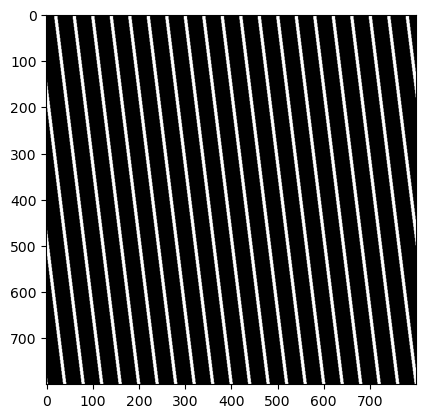

In [2]:
resolucion = 40
periodos = 20
tamanho = resolucion*periodos
ancho = 5 #ancho real es 2*ancho-1, a veces. a veces es un poco menor 
          # probar a que ancho pase un poquito del limite que impondria 2*ancho-1
delta = 100

control = np.zeros((tamanho,tamanho+2*delta))

for i in range(periodos+(2*delta)//resolucion):
    cv2.line(control, (i*resolucion,0), (i*resolucion+delta,len(control)), (255,0,0), ancho)

imagen = control[0:len(control),delta:(len(control[0])-delta)]

fig, ax = plt.subplots()

plt.imshow(imagen, cmap='gray')

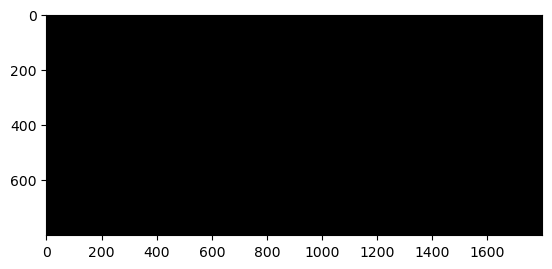

In [3]:
resolution = 40
periods = 20
size = resolution*periods
width = 5 #ancho real es 2*ancho-1, a veces. a veces es un poco menor 
          # probar a que ancho pase un poquito del limite que impondria 2*ancho-1
tilt = 500

control = np.zeros((size, size+2*tilt))

#for i in range(periods+(2*phase)//resolucion):
#    cv2.line(control, (i*resolucion,0), (i*resolucion+delta,len(control)), (255,0,0), ancho)

plt.imshow(control, cmap='gray')

800
900
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 255. 255. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255. 255. 255.
 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0

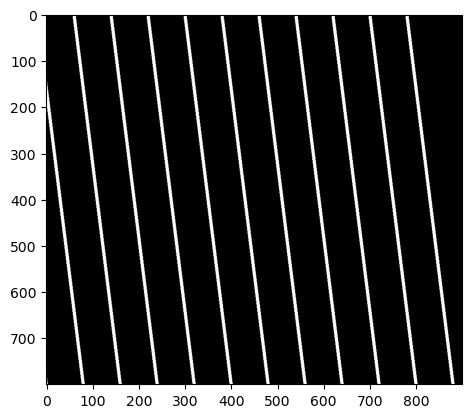

In [4]:
size_x = 800
size_y = 800

width = 5 #ancho real es 2*ancho-1, a veces. a veces es un poco menor 
          # probar a que ancho pase un poquito del limite que impondria 2*ancho-1
shift = 100

image = np.zeros((size_y, size_x+2*shift))

num_lines = 10 # que inician desde la parte superior
resolution = int(size_x/num_lines)
phase = 0
for i in range(num_lines+(2*shift)//resolution):
    cv2.line(image, (i*resolution,0), (i*resolution+shift,len(control)), (255,0,0), width)
    
image = image[0:size_y,shift+phase:(len(control[0])-shift-phase)]

plt.imshow(image, cmap='gray')

print(len(image))
print(len(image[0]))

print(image[0])

In [24]:
def graficador_control(size_x, size_y, width, shift, num_lines, phase):
    image = np.zeros((size_y, 3*size_x))
    resolution = int((size_x-10)/num_lines)
    for i in range(3*num_lines):
        cv2.line(image, (i*resolution,0), (i*resolution+shift,size_y), (255,0,0), width)
    
    image = image[0:size_y,shift+phase:shift+phase+size_x]
    
    plt.imshow(image, cmap='gray')
    
    print(f'parametro: {(resolution*size_y)/(np.sqrt(size_y**2+shift**2))}')
    

ipywidgets.interact(graficador_control,
                        size_x=ipywidgets.SelectionSlider(description='size x',
                                                         options=np.arange(100,1000)
                                                        ),
                        size_y=ipywidgets.SelectionSlider(description='size y',
                                                         options=np.arange(100,1000)
                                                        ),
                        width=ipywidgets.SelectionSlider(description='width',
                                                         options=np.arange(1,100)
                                                        ),
                        shift=ipywidgets.SelectionSlider(description='inclinacion',
                                                         options=np.arange(0,1000)
                                                        ),
                        num_lines=ipywidgets.SelectionSlider(description='numero de lineas',
                                                         options=np.arange(1,80)
                                                        ),
                        phase=ipywidgets.SelectionSlider(description='fase',
                                                         options=np.arange(0,1000)
                                                        )
                       )

interactive(children=(SelectionSlider(description='size x', options=(100, 101, 102, 103, 104, 105, 106, 107, 1…

<function __main__.graficador_control(size_x, size_y, width, shift, num_lines, phase)>

In [155]:
def graficador_control(size_x, size_y, width, shift, resolution, phase):
    image = np.zeros((size_y, 3*size_x))
    
    num_lines = 3*int(size_x/resolution)
    for i in range(num_lines):
        cv2.line(image, (i*resolution,0), (i*resolution+shift,size_y), (255,0,0), width)
    
    image = image[0:size_y,shift+phase:shift+phase+size_x]
    
    plt.imshow(image, cmap='gray')
    print(f'parametro: {(resolution*size_y)/(np.sqrt(size_y**2+shift**2))}')
    

ipywidgets.interact(graficador_control,
                        size_x=ipywidgets.SelectionSlider(description='size x',
                                                         options=np.arange(100,1000)
                                                        ),
                        size_y=ipywidgets.SelectionSlider(description='size y',
                                                         options=np.arange(100,1000)
                                                        ),
                        width=ipywidgets.SelectionSlider(description='width',
                                                         options=np.arange(1,100)
                                                        ),
                        shift=ipywidgets.SelectionSlider(description='inclinacion',
                                                         options=np.arange(0,1000)
                                                        ),
                        resolution=ipywidgets.SelectionSlider(description='espacio',
                                                         options=np.arange(1,1000)
                                                        ),
                        phase=ipywidgets.SelectionSlider(description='fase',
                                                         options=np.arange(0,1000)
                                                        )
                       )

interactive(children=(SelectionSlider(description='size x', options=(100, 101, 102, 103, 104, 105, 106, 107, 1…

<function __main__.graficador_control(size_x, size_y, width, shift, resolution, phase)>

In [58]:
class Control:
    def __init__(self, size_x=100, size_y=100, width=1, shift=0, num_lines=4, phase=0):

        self.size_x = size_x
        self.size_y = size_y
        self.width = width
        self.shift = shift
        self.num_lines = num_lines
        self.phase = phase
        
        image = np.zeros((size_y, 3*size_x))
        resolution = int(size_x/num_lines)
        for i in range(3*num_lines):
            cv2.line(image, (i*resolution,0), (i*resolution+shift,len(image)), (255,0,0), width)
    
        self.resolution = resolution
        self.image = image[0:size_y,shift+phase:shift+phase+size_x]
        
    def get_parameter(self):
        return (self.resolution*self.size_y)/(np.sqrt(self.size_y**2+self.shift**2))
        
    def get_relative_1(self):
        streak = False
        counter = 0
        record = 0
        for i,pixel in enumerate(self.image[0]):
            if pixel != 0:
                counter += 1
                streak = True
                record = counter
            elif pixel == 0 and streak == True:
                streak = False
                counter = 0
            else: pass
        return (record*self.size_y)/(np.sqrt(self.size_y**2+self.shift**2))
        
    def get_relative_2(self): return self.get_parameter() - self.get_relative_1()
        

25.0
1.0
24.0
255.0


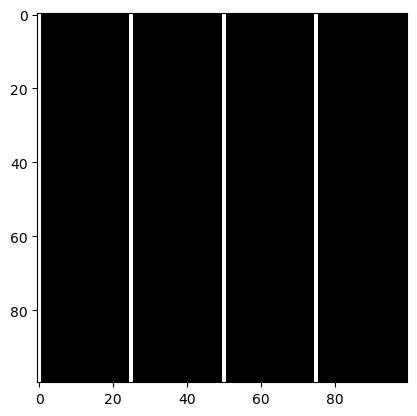

In [59]:
control = Control(size_x=100, size_y=100, width=1, shift=0, num_lines=4, phase=0)
print(control.get_parameter())
print(control.get_relative_1())
print(control.get_relative_2())
plt.imshow(control.image, cmap='gray')
print(control.image[0][0])

In [177]:
class Control:
    def __init__(self, size_x=100, size_y=100, width=1, shift=0, resolution=20, phase=0):

        self.size_x = size_x
        self.size_y = size_y
        self.width = width
        self.shift = shift
        self.resolution = resolution
        self.phase = phase
        
        image = np.zeros((size_y, 3*size_x))
        num_lines = 3*int(size_x/resolution)
        for i in range(num_lines):
            cv2.line(image, (i*resolution,0), (i*resolution+shift,size_y), (255,0,0), width)
    
        self.image = image[0:size_y,shift+phase:shift+phase+size_x]
        
    def get_parameter(self):
        return (self.resolution*self.size_y)/(np.sqrt(self.size_y**2+self.shift**2))
        
    def get_relative_1(self):
        streak = False
        counter = 0
        record = 0
        for i,pixel in enumerate(self.image[0]):
            if pixel != 0:
                counter += 1
                streak = True
                record = counter
            elif pixel == 0 and streak == True:
                streak = False
                counter = 0
            else: pass
        measured_width = (record*self.size_y)/(np.sqrt(self.size_y**2+self.shift**2))
        return measured_width#/self.get_parameter()
        
    def get_relative_2(self): return self.get_parameter() - self.get_relative_1()
        

42.946350571747324
6.991266372144913
35.95508419960241


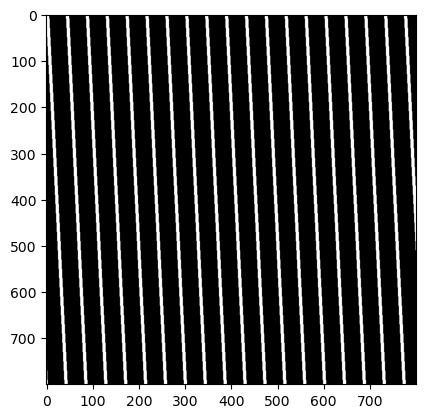

In [67]:
control = Control(size_x=800, size_y=800, width=5, shift=40, resolution=43, phase=0)
print(control.get_parameter())
print(control.get_relative_1())
print(control.get_relative_2())
plt.imshow(control.image, cmap='gray')

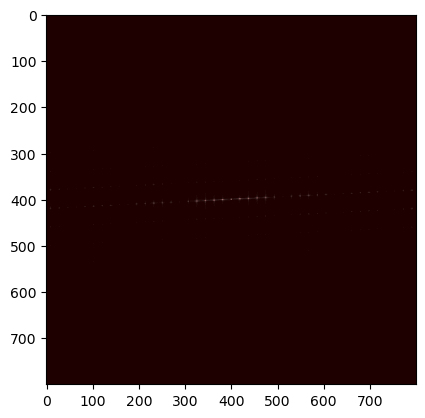

In [96]:
imfft = sp.fft.fft2(control.image)
data = np.abs(sp.fft.fftshift(imfft))
data = data/np.max(data)
plt.imshow(data, cmap='pink')


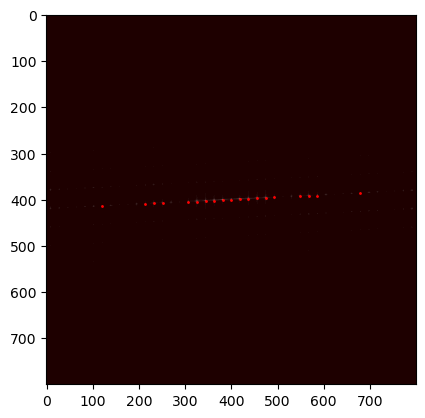

In [98]:
xy = peak_local_max(data, min_distance=5,threshold_abs=0.1)

plt.imshow(data, cmap='pink')#, extent=[-Nx/2, Nx/2-1, Ny/2-1, -Ny/2]
plt.autoscale(False)
plt.plot(xy[:, 1], xy[:, 0], 'ro', markersize=1)

xy_shifted = xy
for i in range(len(xy_shifted)):
    xy_shifted[i][0] -= int(len(data)/2)
    xy_shifted[i][1] -= int(len(data[0])/2)



In [101]:
candidates = np.zeros(len(xy))
for i in range(len(xy)):
    if (xy_shifted[i][0]) != 0 and (xy_shifted[i][1] != 0):
        lamb_x = (size_x)/(xy_shifted[i][1])
        lamb_y = (size_y)/(xy_shifted[i][0])
        candidates[i] = (np.abs(lamb_x)*np.abs(lamb_y))/(np.sqrt(lamb_x**2+lamb_y**2))
    else: pass

#for candidate in candidates:
#    print(candidate)
print(np.max(candidates))
print(control.get_parameter())


42.04706649821094
42.946350571747324


In [158]:
class Results_parameter():
    def __init__(self, result, data, xy, candidates):
        self.result = result
        self.data = data
        self.xy = xy
        self.candidates = candidates

def parameter_measure(image, min_distance=5, threshold_abs=0.1):
    imfft = sp.fft.fft2(image)
    data = np.abs(sp.fft.fftshift(imfft))
    data = data/np.max(data)

    xy = peak_local_max(data, min_distance=min_distance,threshold_abs=threshold_abs)
    
    xy_shifted = np.zeros(np.shape(xy))
    for i in range(len(xy_shifted)):
        xy_shifted[i][0] = xy[i][0] - int(len(data)/2)
        xy_shifted[i][1] = xy[i][1] - int(len(data[0])/2)

    candidates = np.zeros(len(xy_shifted))
    for i in range(len(xy_shifted)):
        if (xy_shifted[i][0]) != 0 and (xy_shifted[i][1] != 0):
            lamb_x = (size_x)/(xy_shifted[i][1])
            lamb_y = (size_y)/(xy_shifted[i][0])
            candidates[i] = (np.abs(lamb_x)*np.abs(lamb_y))/(np.sqrt(lamb_x**2+lamb_y**2))
        elif (xy_shifted[i][0]) == 0 and (xy_shifted[i][1] != 0): 
            candidates[i] = (size_x)/(xy_shifted[i][1])
        elif (xy_shifted[i][0]) != 0 and (xy_shifted[i][1] == 0): 
            candidates[i] = (size_y)/(xy_shifted[i][0])
        else: pass

    return Results_parameter(np.max(candidates), data, xy, candidates)




In [159]:
control = Control(size_x=800, size_y=800, width=5, shift=40, resolution=43, phase=0)
results = parameter_measure(image=control.image, min_distance=5, threshold_abs=0.1)


In [160]:
results.result

42.04706649821094

In [178]:
def comparador_dinamico(size_x, size_y, width, shift, resolution, phase):
    control = Control(size_x, size_y, width, shift, resolution, phase)
    results = parameter_measure(image=control.image, min_distance=1, threshold_abs=0.1)
    
    print(f'parametro teorico: {control.get_parameter()}')
    print(f'parametro medida: {results.result}')
    print(f'relativo teorico: {control.get_relative_1()}')
    print(f'relativo medida: ')
    print(results.candidates)
    #print(results.candidates/results.result)
    
    #plt.imshow(control.image, cmap='gray')
    fig1, (ax1L, ax1R) = plt.subplots(figsize=(12,12),
                                  ncols = 2, tight_layout=True
                                 )
    ax1L.imshow(control.image, cmap='gray')
    ax1R.imshow(results.data, cmap='pink')
    #plt.autoscale(False)
    ax1R.plot(results.xy[:, 1], results.xy[:, 0], 'ro', markersize=3)

ipywidgets.interact(comparador_dinamico,
                        size_x=ipywidgets.SelectionSlider(description='size x',
                                                         options=np.arange(100,1000)
                                                        ),
                        size_y=ipywidgets.SelectionSlider(description='size y',
                                                         options=np.arange(100,1000)
                                                        ),
                        width=ipywidgets.SelectionSlider(description='width',
                                                         options=np.arange(1,100)
                                                        ),
                        shift=ipywidgets.SelectionSlider(description='inclinacion',
                                                         options=np.arange(0,1000)
                                                        ),
                        resolution=ipywidgets.SelectionSlider(description='espacio',
                                                         options=np.arange(1,1000)
                                                        ),
                        phase=ipywidgets.SelectionSlider(description='fase',
                                                         options=np.arange(0,1000)
                                                        )
                       )

interactive(children=(SelectionSlider(description='size x', options=(100, 101, 102, 103, 104, 105, 106, 107, 1…

<function __main__.comparador_dinamico(size_x, size_y, width, shift, resolution, phase)>